### *Modelo de Crecimiento Poblacional*

![](img/cuba3.jpeg)

In [317]:
#Imports:
import numpy as np
from pandas import read_csv, DataFrame
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [318]:
#Lectura del dataset:
data_set = read_csv("data/csv/poblacion-residente.csv")
data_set = DataFrame(data_set)
indices_years = [x for x,y in enumerate(list(data_set["CONCEPTO"]))] #Años
print(f"Tiempos: \n{indices_years}\n")

val_poblacion = list(data_set["Total"]) #Valores de P(t)
n = len(val_poblacion) #Tamaño en datos
print(f"Cantidad de valores: {n}\n")
print(f"Valores de Densidad Poblacional: \n{val_poblacion}\n")

r = list(data_set["Tasa"]) #Tasas
print(f"Valores de tasa de crecimiento anual de la poblacion: \n{r}")



Tiempos: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

Cantidad de valores: 43

Valores de Densidad Poblacional: 
[9693907, 9753243, 9844836, 9938760, 10032721, 10138642, 10228330, 10334993, 10443789, 10548347, 10662148, 10756829, 10829320, 10895987, 10912924, 10947119, 10983326, 11033993, 11076817, 11113128, 11146203, 11168526, 11200388, 11215388, 11217590, 11218623, 11202632, 11188028, 11173996, 11174952, 11167934, 11175423, 11173151, 11210064, 11238317, 11239004, 11239224, 11221060, 11209628, 11193470, 11181595, 11113215, 11089511]

Valores de tasa de crecimiento anual de la poblacion: 
[-6.2, 6.1, 9.3, 9.5, 9.4, 10.5, 8.8, 10.4, 10.5, 10.0, 11.1, 8.8, 6.7, 6.1, 1.6, 3.1, 3.3, 4.6, 3.9, 3.3, 3.0, 2.0, 2.8, 1.3, 0.2, 0.1, -1.4, -1.3, -1.3, 0.1, -0.6, 0.7, -0.2, 3.3, 2.5, 0.1, 0.0, -1.6, -1.0, -1.4, -1.1, -6.1, -2.1]


In [319]:
#Convertir a array para trabajar los datos como vectores:
t_data = np.array(indices_years)
P_data = np.array(val_poblacion)

In [320]:
# Definicion de la función logística
def logistic_function(t, A, K, r):
    return K / (1 + A * np.exp(-r * t))


In [321]:
# Parámetros iniciales:
initial_guess = [1, 10000000, 0.01]  # Asume un valor inicial para A, K y r

# Ajustar el modelo a los datos observados
popt, pcov = curve_fit(logistic_function, t_data, P_data, p0=initial_guess, sigma=None, absolute_sigma=False)

# Imprimir los parámetros estimados
print("Parámetros estimados:", popt)


Parámetros estimados: [1.81636488e-01 1.12562138e+07 1.19522467e-01]


Este código ajustará la función logística a los datos observados, buscando los valores óptimos de (A), (K), y (r) que minimicen la diferencia entre los datos observados y los predichos por el modelo. La función `curve_fit` del modulo `scipy.optimize` devuelve dos arrays: `popt`, que contiene los *parámetros estimados*, y `pcov`, que contiene la *covarianza de los parámetros estimados*.

La función `curve_fit` es parte de la biblioteca `SciPy` y se utiliza para ajustar una función a un conjunto de datos mediante el método de *mínimos cuadrados*. Su objetivo principal es encontrar los parámetros de la función que minimizan la diferencia entre los valores observados y los predichos por la función

In [322]:
#Luego se formatean los datos:
params_formateados = [format(param, ".2f") for param in popt]
print("Parametros formateados: \n", params_formateados)

#Asignacion:
A = float(params_formateados[0]) #Constante A
K = float(params_formateados[1])
K = int(K) #Parametro K
r_intrinseca = float(params_formateados[2]) # Tasa intrinseca de crecimiento r
print(f"A = {A}\nK = {K}\nr = {r_intrinseca}")


Parametros formateados: 
 ['0.18', '11256213.83', '0.12']
A = 0.18
K = 11256213
r = 0.12


### *Comparacion Datos Reales Vs Evaluaciones de la Funcion Logistica*

Reales Vs Prediccion
9693907 vs 9539163
9753243 vs 9706596
9844836 vs 9860092
9938760 vs 10000351
10032721 vs 10128131
10138642 vs 10244225
10228330 vs 10349442
10334993 vs 10444586
10443789 vs 10530447
10548347 vs 10607788
10662148 vs 10677341
10756829 vs 10739796
10829320 vs 10795804
10895987 vs 10845969
10912924 vs 10890854
10947119 vs 10930974
10983326 vs 10966807
11033993 vs 10998784
11076817 vs 11027302
11113128 vs 11052719
11146203 vs 11075360
11168526 vs 11095519
11200388 vs 11113460
11215388 vs 11129420
11217590 vs 11143615
11218623 vs 11156234
11202632 vs 11167450
11188028 vs 11177417
11173996 vs 11186272
11174952 vs 11194137
11167934 vs 11201122
11175423 vs 11207325
11173151 vs 11212832
11210064 vs 11217720
11238317 vs 11222060
11239004 vs 11225911
11239224 vs 11229330
11221060 vs 11232363
11209628 vs 11235055
11193470 vs 11237443
11181595 vs 11239563
11113215 vs 11241443
11089511 vs 11243111


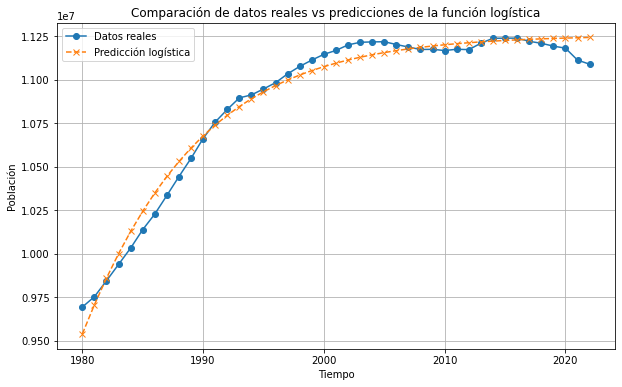

In [323]:
# Valores predichos por la función logística
predicted_population = logistic_function(t_data, A, K, r_intrinseca)
predicted_population = [int(x) for x in predicted_population]
print("Reales Vs Prediccion\n=====================")
for i,j in zip(list(P_data), list(predicted_population)):
    print(i, "vs", j)

years = np.arange(1980,2023) #Vector de años

# Plot de los datos reales vs los predichos
plt.figure(figsize=(10, 6))
plt.plot(years, P_data, label='Datos reales', marker='o', linestyle='-')
plt.plot(years, predicted_population, label='Predicción logística', marker='x', linestyle='--')

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Comparación de datos reales vs predicciones de la función logística')
plt.legend()

plt.grid(True)
plt.show()